# Redes neuronales

La librería que utilizaremos para definir nuestras redes neuronales es tensorflow 2.7.0: https://www.tensorflow.org/?hl=es-419



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [3]:
tensorflow.__version__

'2.15.0'

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>
Los pasos básicos a seguir con tensorflow son:

1. Definimos un modelo: indicamos cantidad y tipos de neuronas. <pr>Topologia</pr>
2. Compilamos el modelo: indicamos función de <pr>costo y optimizador</pr>.
3. Entrenamos el modelo: cantidad de <pr>iteraciones (epochs)</pr> y otros parámetros.

Vamos a comenzar trabajando con un dataset sintético simplemente para conocer como trabaja tensorflow.

La siguiente celda simplemente arma el dataset sintético.

In [4]:
from sklearn.datasets import make_blobs, make_moons
# X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=0)

X, y = make_moons(n_samples=1000, random_state=0)

In [5]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


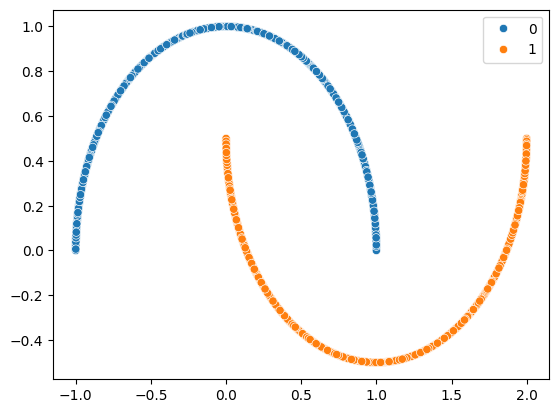

In [6]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Unas de las maneras de definir una red neuronal en tensorflow keras es Sequential.

En sequential, lo que hacemos es definir el modelo de la siguiente manera:

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Topologia propuesta.
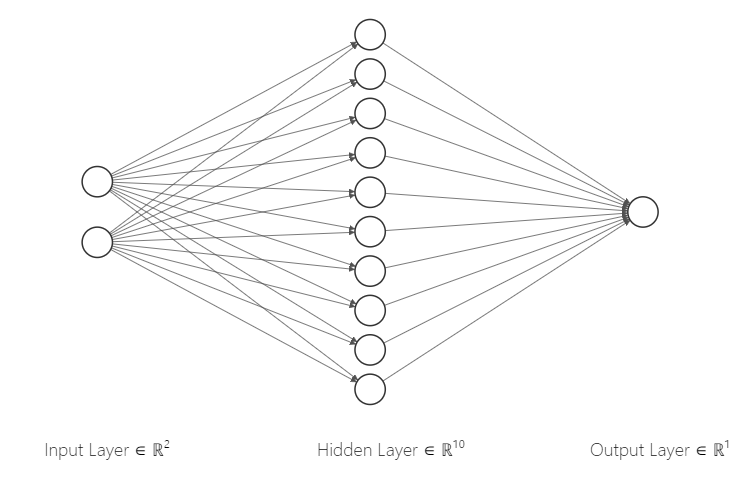

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>
Lo primero que hicimos fué definir el modelo sequential.

Una vez definido, le vamos agregando capas. En este caso, primero agregamos una capa de 10 neuronas (Dense) con función de activación relu.

Luego, una capa con 1 sola neurona y la función de activación <y>logistica, sigmoid ó soft step</y> (es la misma).

Tenemos 1 sola capa de salida con sigmoid y esto significa que nuestra salida sera un <y>valor entre 0 y 1</y>.

Ahora debemos definir un optimizador y compilar nuestro modelo:

Uno de los optimizadores más utilizado es Adam.

In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
optimizer = Adam(learning_rate=0.001)

Al compliar el modelo, debemos especificar la ***"función de costo"*** ***loss function*** y podemos también, definir una métrica.

En este caso utilizaremos como loss function: ***binary_crossentropy***.

Binary crossentropy es la loss function más común para problemas de clasificación binaria.

Lo que hace es comparar nuestras predicciones contra el resultado real y penaliza según la distancia que hay entre el resultado esperado y nuestras predicciones.

$$
-\frac{1}{N} \sum_{i=1}^{N} y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)
$$

In [11]:
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>
Ahora ya podemos entrenar nuestro modelo.

Podemos ir guardando los resultados en una variable (history) para futuro análisis.

¿Qué son epochs?  
<y>Son las sucesivas iteraciones de ajuste en los pesos y en los sesgos, en general en los parámetros, para minimizar la función de costo.</y>

In [12]:
history = model.fit(X, y, epochs=250, validation_split=0.25, batch_size=32,verbose=False)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Podemos analizar nuestra variable history:

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


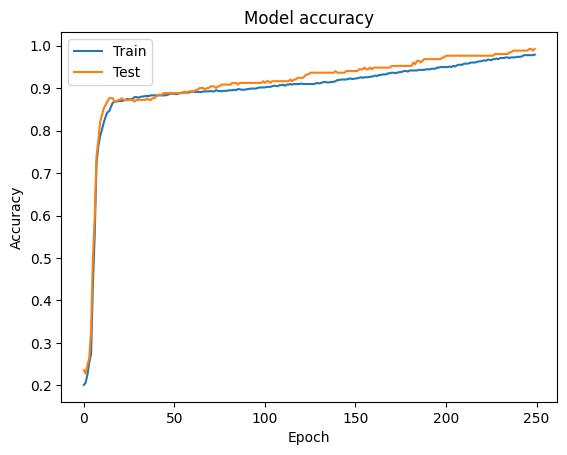

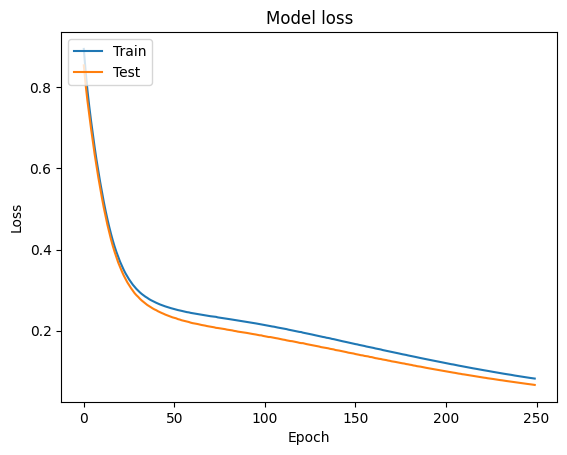

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
def plot_history(history):
    # Plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

¿ Por qué loss baja y accuracy sube ?

El siguiente código plotea las fronteras de decisión.

1250/1250 [==============================] - 1s 560us/step


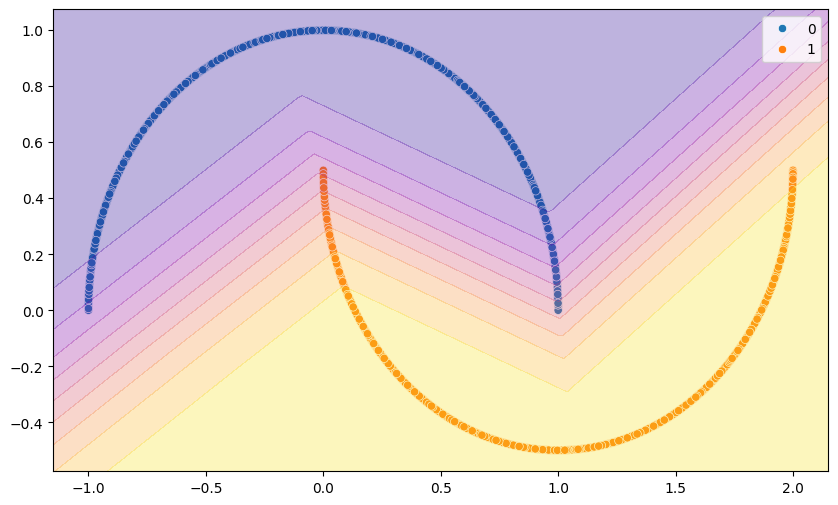

In [17]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

In [18]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 6))
    
    # Plot data points
    ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create meshgrid for contour plot
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot decision boundary
    contours = ax.contourf(xx, yy, Z, levels=10, alpha=0.3, cmap='plasma')
    plt.show()

In [19]:
def plot_decision_boundary2(model, X, y, umbral=0.5):
    plt.figure(figsize=(10, 6))
    
    # Dibuja los puntos
    ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Crea la malla para el contorno
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Aplica el umbral para decidir
    Z = (Z > umbral).astype(int)
    
    # Dibuja el contorno
    contours = ax.contourf(xx, yy, Z, levels=1, alpha=0.3, cmap='plasma')
    plt.show()

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>
#### Ejercicio

Volver a entrenar una red neuronal y graficar las fronteras de decisión (lo mismo que ya hicimos) pero esta vez agregar una capa más con 10 neuronas.

Es decir, debemos tener 2 capas de 10 neuronas con Relu y luego una capa de 1 neurona con softmax (sigmoide).  
<y>Softmax es la generalización de la logistica o sigmoide para más de dos clases recibe un vector y devuelve un vector</y>
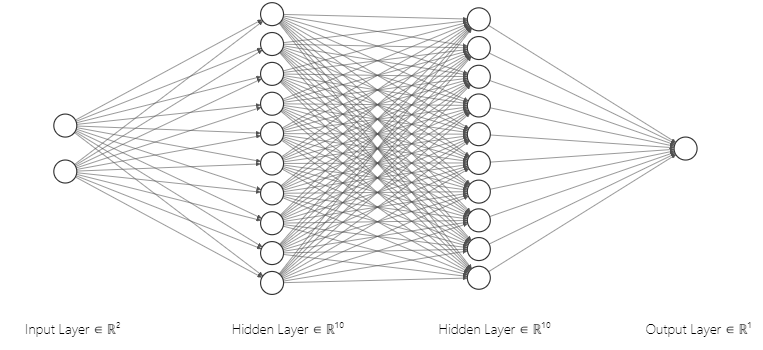

In [20]:
#COMPLETAR
model2 = Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)

model2.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=250, validation_split=0.25, batch_size=32, verbose=False)

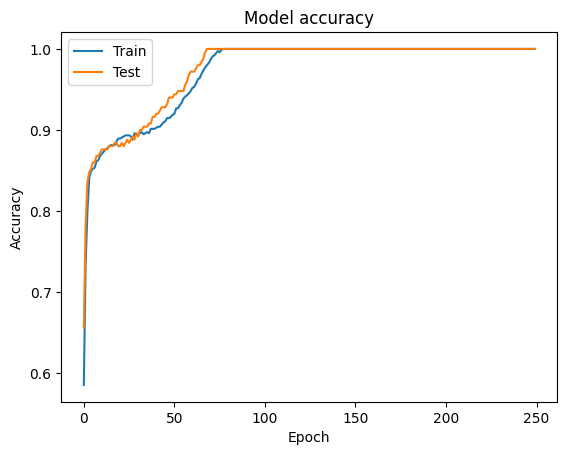

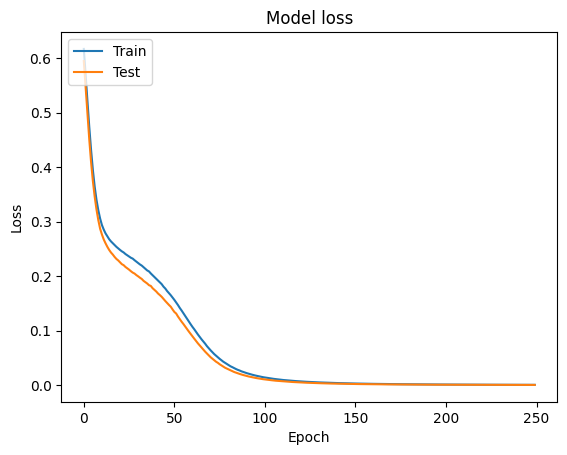

In [21]:
plot_history(history2)

1250/1250 [==============================] - 1s 579us/step


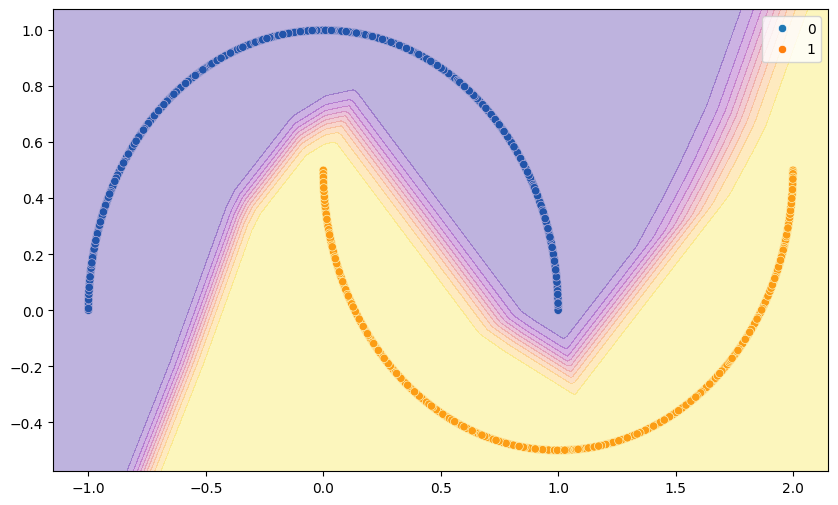

In [22]:
plot_decision_boundary(model2,X,y)

Ahora lo hacemos *"Decidiendo sobre las probabilidades"* mediante un **umbral** en este caso 0.5.

1250/1250 [==============================] - 1s 574us/step


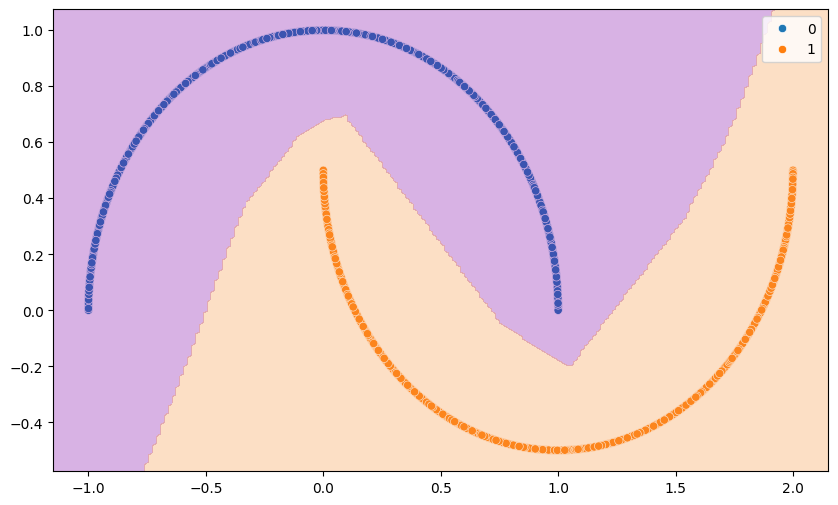

In [23]:
plot_decision_boundary2(model2,X,y,umbral=0.5)

¿Cambió?

Podemos ver que a medida que agregamos capas y neuronas (modelo más complejo) el modelo se adapta mejor a los datos (ojo con overfitting).


# MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en fotos de dígitos escritos a mano. Muchos modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

En un problema de clasificación con más de 2 clases (no binario) en general utilizaremos softmax en la última capa. Softmax es una generalización de la función sigmoide.
$$\text{softmax}(\bold z)_i = \frac{e^{z_i}}{\displaystyle \sum_{j=1}^{n} e^{z_j}}$$
Pero se utiliza esta otra forma para evitar inestabilidad numérica en numeros grandes:
$$\text{softmax}(\bold z)_i = \frac{e^{z_i-z_{max}}}{\displaystyle \sum_{j=1}^{n} e^{z_j-z_{max}}}$$
La función se aplica en $\mathbb{R}^n \to \mathbb{[0,1]^n}$ es decir que como resultado da un vector con componentes con valores entre 0 y 1 y la suma de las componentes del vector es 1.

Softmax nos tira un valor entre 0 y 1 para cada uno de los valores de salida. Si sumamos todas las salidas siempre va a ser = 1

In [24]:
from tensorflow.keras.datasets import mnist

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
X_train[10].shape

(28, 28)

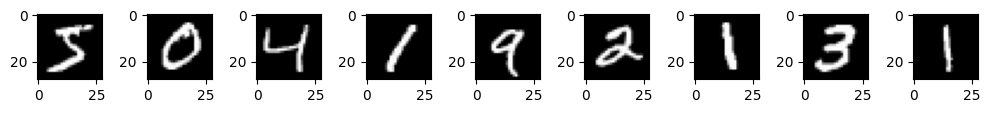

In [27]:
# for i in range(9):  
#   plt.subplot(330 + 1 + i)
#   plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
#   plt.show()

plt.figure(figsize=(10, 5))  # Tamaño de la figura
for i in range(9):
    plt.subplot(1, 9, i+1)  # Crear un subgráfico en la posición i+1 de la cuadrícula 3x3
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()  # Ajustar subgráficos
plt.show()

In [28]:
print(y_train[:9])

[5 0 4 1 9 2 1 3 1]


In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
y_train.shape

(60000,)

Veamos en que formato está y:

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Necesitamos convertir esto a un vector de one hot para entrenar nuestra red neuronal.

EJERCICIO:

Aplicar one hot encoder a y (train y test)

In [32]:
#COMPLETAR
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Datos de ejemplo
data_ejemplo = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
def onehot(data):
    # Reshape del array para que tenga una columna por clase
    data = data.reshape(-1, 1)
    # Crear el objeto OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, categories='auto')
    # Aplicar el OneHotEncoder a los datos
    return encoder.fit_transform(data)

# Mostrar el resultado
print(onehot(data_ejemplo))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [33]:
y_train.shape

(60000,)

In [34]:
y_train_h=onehot(y_train)
y_train_h.shape

(60000, 10)

In [35]:
y_test.shape

(10000,)

In [36]:
y_test_h=onehot(y_test)
y_test_h.shape

(10000, 10)

Cada imagen tiene un tamaño de 28x28. Por lo tanto, debemos "aplanarlas" y convertirlas en una lista de 1 dimensión. Las capas densas esperan recibir una entrada de 1 dimensión.

En tensorflow, podemos utilizar una capa "flatten" para esto.

In [37]:
from tensorflow.keras.layers import Flatten

EJERCICIO:

Definir un modelo que tenga como entrada una capa del tipo Flatten. (definir input_shape).

Luego una capa densa de 128 neuronas y Relu.

Finalmente, la capa de salida. ¿De qué tipo será? ¿Cantidad de neuronas? ¿Función de activación?

In [47]:
#COMPLETAR

model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [48]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Parámetros de flatten $= 28\cdot28 = 784$  
Parámetros de primera capa $= w \rightarrow 784 \cdot 128 + b \rightarrow 128 = 100480$  
Parámetros de segunda capa $= w \rightarrow 128 \cdot 10 + b \rightarrow 10 = 129$  

Ahora compilar el modelo.

Utilizar como optimizer adam (lr de 0.0003), categorical_crossentropy como loss y accuracy como métrica.

In [49]:
#COMPLETAR
model3.compile(optimizer=Adam(learning_rate=0.003), loss='categorical_crossentropy',metrics=['accuracy'])

Entrenar por 10 epocas. Setear un validation split de 10%. Recuerden guardar los resultados en la variable "history"

In [50]:
#COMPLETAR
history3 = model3.fit(X_train, y_train_h, epochs=10, validation_split=0.1, verbose=False)

Ploteamos las métricas:

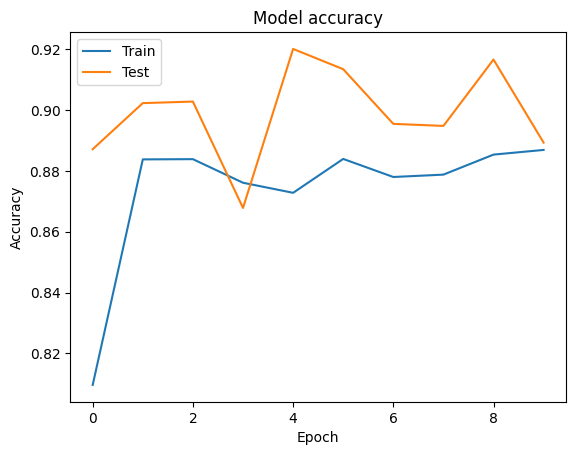

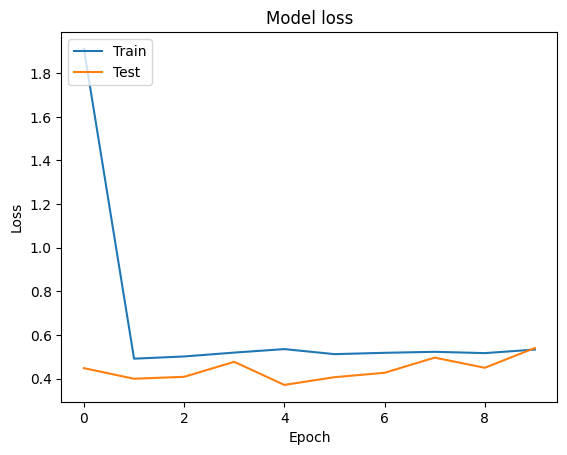

In [51]:
plot_history(history3)

Con nuestra red neuronal podemos hacer predicciones igual que siempre:

In [52]:
predictions = model3.predict(X_test)

313/313 [==============================] - 0s 728us/step


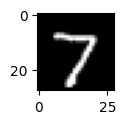

In [53]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.show()

In [54]:
predictions[0]

array([4.72322571e-27, 3.39416372e-15, 1.03628147e-19, 9.87693149e-10,
       3.95445844e-15, 1.38973631e-13, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 3.01019721e-14], dtype=float32)

Vemos que no son números enteros sino que son probabilidades y entre todas suman 1.

In [55]:
predictions[0].argmax()

7

In [56]:
y_test_h[0].argmax()

7

Podemos evaluar:

In [57]:
test_loss, test_acc = model3.evaluate(X_test,  y_test_h, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6308 - accuracy: 0.8713 - 236ms/epoch - 755us/step

Test accuracy: 0.8712999820709229
